In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
x=np.linspace(0,100,1000)

In [3]:
y=np.sin(x)

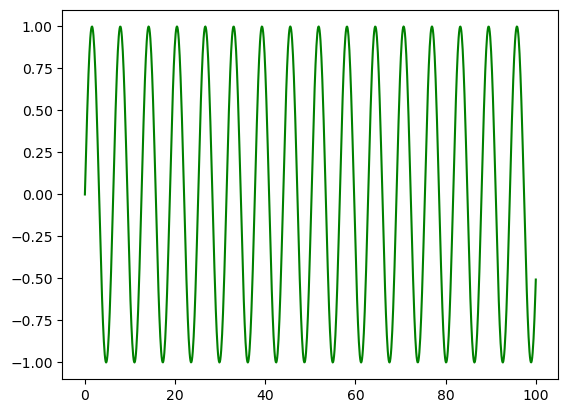

In [4]:
plt.plot(x,y,c='g')

In [5]:
data=pd.DataFrame(y,index=x,columns=['Sin'])
data.head()

,Sin
0.0000,0.000000
0.1001,0.099933
0.2002,0.198866
0.3003,0.295807
0.4004,0.389787


In [6]:
len(data)

1000

In [7]:
#Taking 20% as test
train_data=data.iloc[:800]
test_data=data.iloc[800:]

In [8]:
len(train_data)

800

In [9]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [10]:
scaled_train_data=scaler.fit_transform(train_data)
scaled_test_data=scaler.transform(test_data)

In [11]:
#Time Series Generator

In [12]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [13]:
Ts_generator=TimeseriesGenerator(scaled_train_data[:700],scaled_train_data[:700],length=50,batch_size=1)

In [14]:
Ts_val_generator=TimeseriesGenerator(scaled_train_data[700:],scaled_train_data[700:],length=50,batch_size=1)

In [82]:
#Model Creation Simple RNN

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense,Dropout,BatchNormalization,Input,LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
early_stopping=EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

In [18]:
model1=Sequential([
    Input(shape=(50,1)),
    SimpleRNN(50),
    Dense(1)
])

In [19]:
model1.compile(optimizer='adam',loss='mse')

In [20]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model1.fit(Ts_generator,epochs=10,validation_data=Ts_val_generator,callbacks=[early_stopping])

Epoch 1/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0252 - val_loss: 4.5979e-05
Epoch 2/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.0781e-04 - val_loss: 3.7539e-04
Epoch 3/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.4901e-04 - val_loss: 1.4340e-05
Epoch 4/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.2133e-04 - val_loss: 1.2759e-04
Epoch 5/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.4083e-05 - val_loss: 1.7839e-04
Epoch 6/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.9536e-04 - val_loss: 1.8124e-05


In [22]:
loss=pd.DataFrame(model1.history.history)
loss

,loss,val_loss
0,0.005627,0.000046
1,0.000448,0.000375
2,0.000113,0.000014
3,0.000166,0.000128
4,0.000034,0.000178
5,0.000614,0.000018


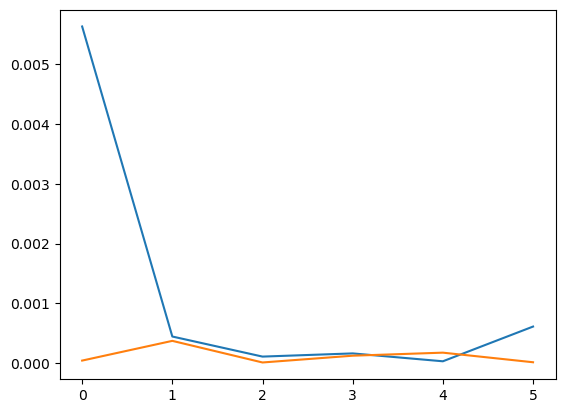

In [23]:
plt.plot(loss)

In [24]:
test_sample=scaled_train_data[-50:]
test_sample=test_sample.reshape((1,50,1))

In [25]:
pred=model1.predict(test_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


In [26]:
pred

array([[-0.00268012]], dtype=float32)

In [27]:
scaled_test_data[0]

array([0.00023303])

In [28]:
scaler.inverse_transform(pred)

array([[-1.0053602]], dtype=float32)

In [29]:
test_data.iloc[0]

Sin   -0.999534
Name: 80.08008008008008, dtype: float64

In [30]:
#Predictions

In [31]:
test_predictions=[]
sample=scaled_train_data[-50:].reshape((1,50,1))
for i in range(len(test_data)):
    pred=model1.predict(sample)[0]
    test_predictions.append(pred) 
    sample=np.append(sample[:,1:,:],[[pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━

In [32]:
test_predictions

[array([-0.00268012], dtype=float32),
 array([-0.00020818], dtype=float32),
 array([0.00479221], dtype=float32),
 array([0.01507279], dtype=float32),
 array([0.03053869], dtype=float32),
 array([0.05028077], dtype=float32),
 array([0.07520707], dtype=float32),
 array([0.10321332], dtype=float32),
 array([0.13510402], dtype=float32),
 array([0.17189717], dtype=float32),
 array([0.21206586], dtype=float32),
 array([0.25523305], dtype=float32),
 array([0.30092442], dtype=float32),
 array([0.34872437], dtype=float32),
 array([0.40067273], dtype=float32),
 array([0.4497837], dtype=float32),
 array([0.5021368], dtype=float32),
 array([0.5542589], dtype=float32),
 array([0.6051934], dtype=float32),
 array([0.656098], dtype=float32),
 array([0.7029101], dtype=float32),
 array([0.7508165], dtype=float32),
 array([0.79387933], dtype=float32),
 array([0.8332812], dtype=float32),
 array([0.8711791], dtype=float32),
 array([0.90347284], dtype=float32),
 array([0.9326901], dtype=float32),
 array([0.

In [33]:
prediction=scaler.inverse_transform(test_predictions)

In [34]:
prediction

array([[-1.00536022],
       [-1.00041634],
       [-0.99041555],
       [-0.9698544 ],
       [-0.93892259],
       [-0.89943844],
       [-0.84958584],
       [-0.79357335],
       [-0.72979195],
       [-0.65620564],
       [-0.57586826],
       [-0.48953389],
       [-0.39815115],
       [-0.30255126],
       [-0.19865452],
       [-0.10043256],
       [ 0.00427366],
       [ 0.10851777],
       [ 0.21038676],
       [ 0.31219602],
       [ 0.40582026],
       [ 0.50163305],
       [ 0.58775866],
       [ 0.66656244],
       [ 0.74235821],
       [ 0.80694568],
       [ 0.86538017],
       [ 0.91518402],
       [ 0.9522686 ],
       [ 0.98581409],
       [ 1.00335717],
       [ 1.0137136 ],
       [ 1.01482033],
       [ 1.00392866],
       [ 0.98662233],
       [ 0.95568323],
       [ 0.91914642],
       [ 0.8734014 ],
       [ 0.81592965],
       [ 0.75447881],
       [ 0.68290842],
       [ 0.60679531],
       [ 0.52469552],
       [ 0.43596244],
       [ 0.34743286],
       [ 0

In [35]:
test_data.loc[:, 'Predictions'] = prediction

In [36]:
test_data.head()

,Sin,Predictions
80.08008,-0.999534,-1.005360
80.18018,-0.997581,-1.000416
80.28028,-0.985641,-0.990416
80.38038,-0.963833,-0.969854
80.48048,-0.932375,-0.938923


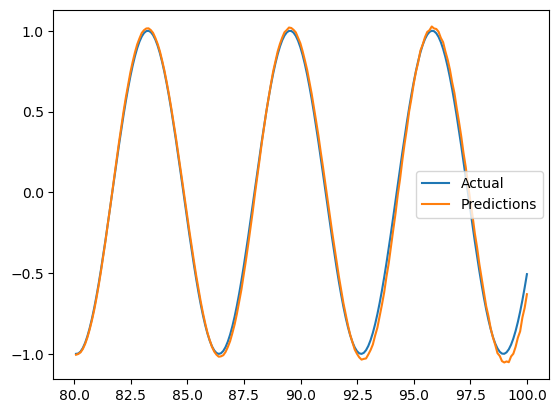

In [80]:
plt.plot(test_data.index, test_data["Sin"], label="Actual")
plt.plot(test_data.index, test_data["Predictions"], label="Predictions")
plt.legend()

In [86]:
#Creating LSTM model

In [130]:
model2=Sequential([
    Input(shape=(50,1)),
    LSTM(50),
    Dense(1)
])
model2.compile(optimizer='adam',loss='mse')

In [132]:
model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [134]:
model2.fit(Ts_generator,epochs=10,validation_data=Ts_val_generator,callbacks=[early_stopping])

Epoch 1/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0346 - val_loss: 2.2799e-05
Epoch 2/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.7352e-04 - val_loss: 1.4248e-05
Epoch 3/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4.4038e-05 - val_loss: 1.9141e-05
Epoch 4/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 7.9145e-05 - val_loss: 9.5709e-05
Epoch 5/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.0614e-04 - val_loss: 6.8970e-06
Epoch 6/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 7.2921e-05 - val_loss: 6.0353e-05
Epoch 7/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.2193e-05 - val_loss: 1.6496e-05
Epoch 8/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.2563e-05 - val_loss: 3.8854e-04


In [136]:
test_predictions=[]
sample=scaled_train_data[-50:].reshape((1,50,1))
for i in range(len(test_data)):
    pred=model2.predict(sample)[0]
    test_predictions.append(pred) 
    sample=np.append(sample[:,1:,:],[[pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/

In [138]:
prediction=scaler.inverse_transform(test_predictions)

In [140]:
test_data.loc[:, 'LSTM Predictions'] = prediction

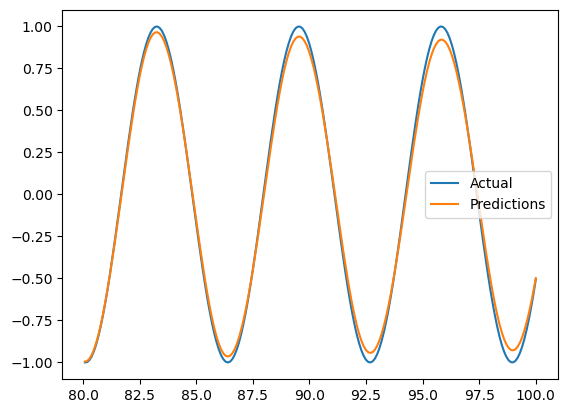

In [142]:
plt.plot(test_data.index, test_data["Sin"], label="Actual")
plt.plot(test_data.index, test_data["LSTM Predictions"], label="Predictions")
plt.legend()

In [144]:
#Forecasting

In [146]:
Scaler=MinMaxScaler()
scaled_data=Scaler.fit_transform(data)

In [184]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
val_data   = scaled_data[train_size:]

In [188]:
train_generator = TimeseriesGenerator(train_data, train_data, length=50, batch_size=1)

val_generator = TimeseriesGenerator(val_data, val_data, length=50, batch_size=1)

In [190]:
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(50, 1)),
    Dropout(0.2),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')


In [212]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=50,
                    callbacks=[early_stop, lr_scheduler])

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0011 - val_loss: 2.1017e-04 - learning_rate: 5.0000e-04
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0011 - val_loss: 7.1529e-04 - learning_rate: 5.0000e-04
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 5.2889e-04 - val_loss: 5.8180e-04 - learning_rate: 5.0000e-04
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 5.2793e-04 - val_loss: 0.0011 - learning_rate: 5.0000e-04
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 4.7385e-04 - val_loss: 1.1236e-04 - learning_rate: 5.0000e-04
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 6.0216e-04 - val_loss: 3.5572e-04 - learning_rate: 5.0000e-04
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 2.4847e-04 - val_loss: 3.8131e-04 - learning_rate: 2.5000e-04
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 2.2343e-04 - val_loss: 4.4881e-05 - learning_rate: 2.5000e-04
Epoch 9/50
750/750 ━━━━━━━━━━━━━━━━━

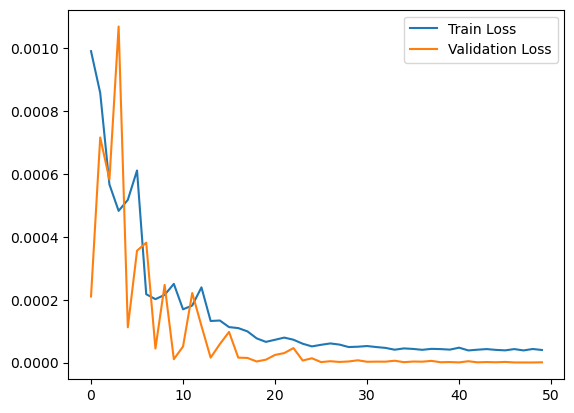

In [214]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [249]:
forecast_end = 200
step = data.index[1] - data.index[0]
last_index = data.index[-1]

num_steps = int((forecast_end - last_index) / step)

sample = scaled_data[-50:].reshape((1, 50, 1))
forecast = []
forecast_index = []

for i in range(num_steps):
    next_value = model.predict(sample, verbose=0)[0]
    forecast.append(next_value)
    forecast_index.append(last_index + (i+1)*step)
    sample = np.append(sample[:, 1:, :], [[next_value]], axis=1)

forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

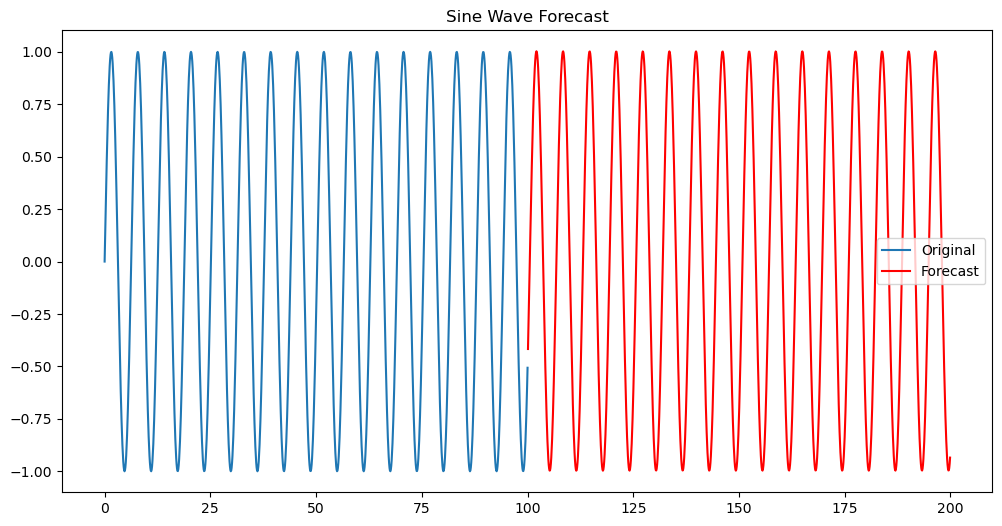

In [253]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Sin'], label="Original")
plt.plot(forecast_index, forecast, label="Forecast", color='red')
plt.legend()
plt.title("Sine Wave Forecast")
plt.show()